# 911 Calls - data visualization project

In this notebook I analyze 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert), based on the coursework from the Python for Data Science and Machine Learning Bootcamp on [Udemy](https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp).

## Data and Setup

____
** Import numpy and pandas **

In [1]:
import numpy as np
import pandas as pd

** Import visualization libraries and set %matplotlib inline. **

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

** Read in the csv file of 911 calls data **

In [3]:
df = pd.read_csv('911.csv')

** Check the info() of the df **

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Check the head of df **

In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Data Exploration

____
** What are the top 5 zipcodes for 911 calls? **

In [6]:
df.zip.value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** What are the top 5 townships (twp) for 911 calls? **

In [7]:
df.twp.value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** H|ow many unique title codes are there? **

In [8]:
df.title.nunique()

110

## Feature Engineering

______
** From the title column, extract the "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. **

In [9]:
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])

** What is the most common Reason for a 911 call? **

In [10]:
df.Reason.value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

** Extract the specific department from the title column **

In [11]:
df['Department'] = df['title'].apply(lambda x: x.split(':')[1])

** Countplot of 911 calls by Reason. **

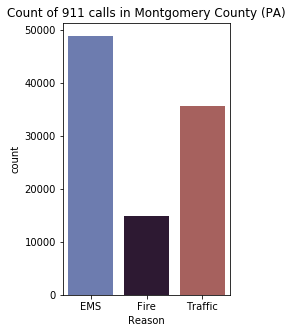

In [13]:
plt.figure(figsize=(3,5))
sns.countplot(df['Reason'],palette='twilight')
plt.title('Count of 911 calls in Montgomery County (PA)')
plt.show()

** Check data types **

In [14]:
df.dtypes

lat           float64
lng           float64
desc           object
zip           float64
title          object
timeStamp      object
twp            object
addr           object
e               int64
Reason         object
Department     object
dtype: object

In [15]:
type(df['timeStamp'].iloc[0])

str

** Convert the column from strings to DateTime objects. **

In [16]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

** What is the date range of the dataset? **

In [17]:
str(df['timeStamp'].min().date()), str(df['timeStamp'].max().date())

('2015-12-10', '2016-08-24')

** Create new columns of Hour, Month, and Day of Week based off of the timeStamp column.**

In [18]:
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['Month'] = df['timeStamp'].apply(lambda x: x.month)
df['Day of Week'] = df['timeStamp'].apply(lambda x: x.dayofweek)

In [19]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)

## Data viz: calls by date

____
** Create a countplot of Day of Week for EMS, Fire and Traffic calls. **

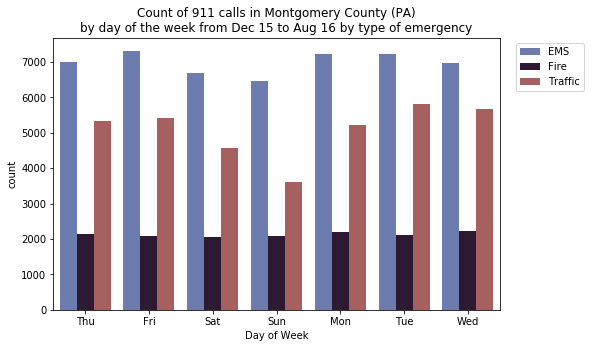

In [20]:
plt.figure(figsize=(8,5))
sns.countplot(x='Day of Week',data=df,hue='Reason',palette='twilight')
plt.legend(loc=1,bbox_to_anchor=(1.2,1))
plt.title('Count of 911 calls in Montgomery County (PA)' +'\n'+'by day of the week from Dec 15 to Aug 16 by type of emergency')
plt.show()

** Create the same plot for Month **

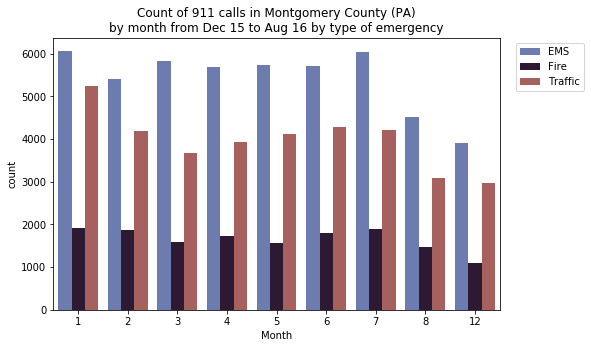

In [21]:
plt.figure(figsize=(8,5))
sns.countplot(x='Month',data=df,hue='Reason',palette='twilight')
plt.legend(loc=1,bbox_to_anchor=(1.2,1))
plt.title('Count of 911 calls in Montgomery County (PA)'+'\n'+ 'by month from Dec 15 to Aug 16 by type of emergency')
plt.show()

** Count the number of calls by month **

In [22]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Department,Hour,Day of Week
Month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423


** Now create a simple plot off of the dataframe indicating the count of calls per month. **

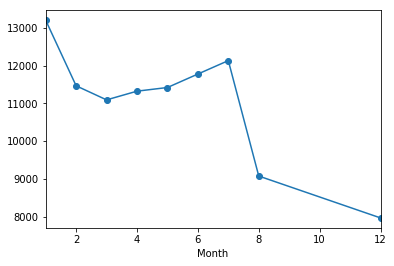

In [23]:
byMonth['twp'].plot(marker='o')

** Estimate a linear fit on the number of calls per month. **

C:\Users\franc\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


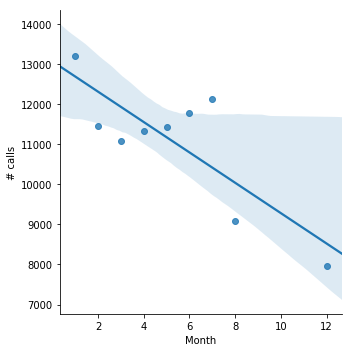

In [24]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())
plt.ylabel('# calls')
plt.show()

** Look at number of calls by date ** 

In [25]:
df['Date'] = df['timeStamp'].apply(lambda x: x.date())

** Create a plot of counts of 911 calls by date.**

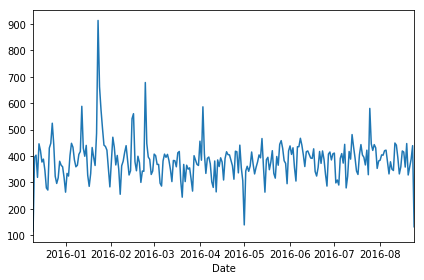

In [26]:
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

** Obtain the same plot by Reason for the 911 call**

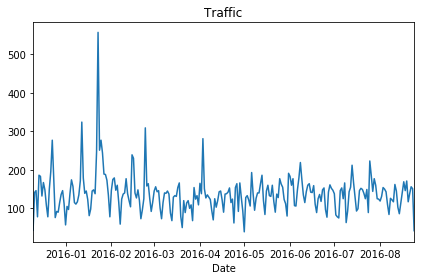

In [27]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

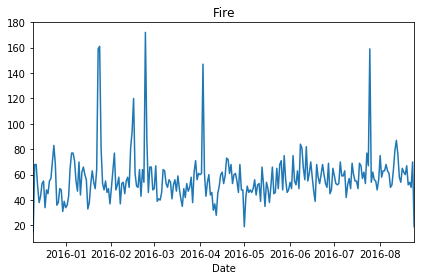

In [28]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

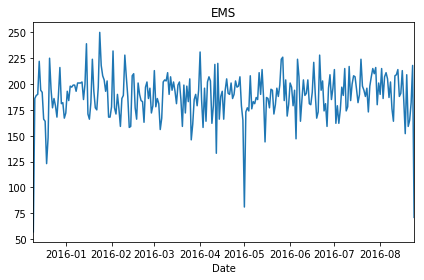

In [29]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

____
** Create heatmaps to visualize the frequency of calls by day of the week at different hours of the day and month of the year**

In [30]:
df_hrdow = df.groupby(['Day of Week', 'Hour']).count()['Reason'].unstack()

In [31]:
df_hrdow.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


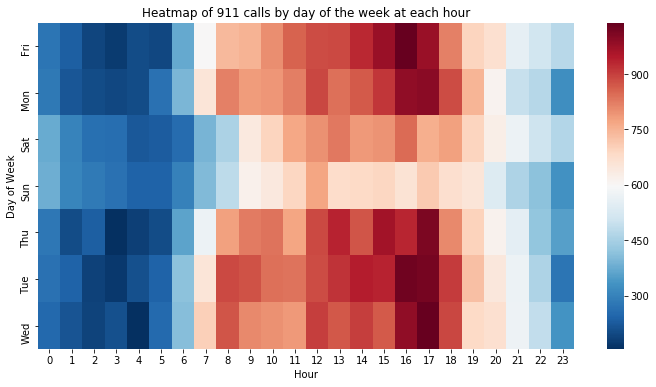

In [32]:
plt.figure(figsize=(12,6))
sns.heatmap(df_hrdow,cmap='RdBu_r')
plt.title('Heatmap of 911 calls by day of the week at each hour')
plt.show()

** Now create a clustermap using this DataFrame. **

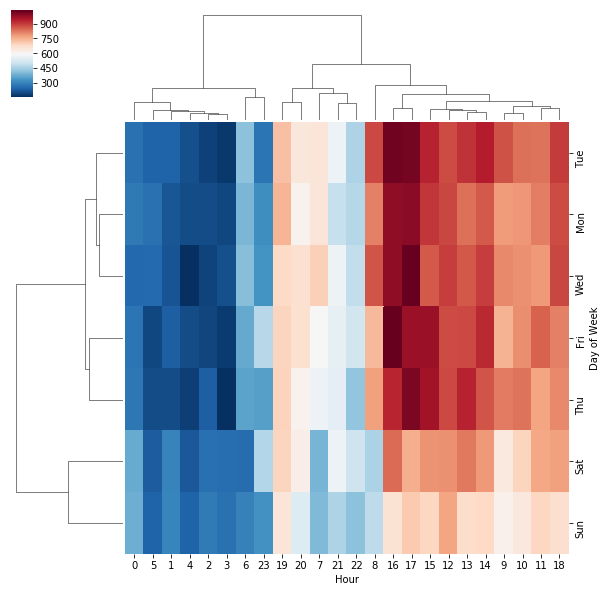

In [33]:
sns.clustermap(df_hrdow,cmap='RdBu_r')
plt.show()

In [34]:
df_dm = df.groupby(['Day of Week','Month']).count()['Reason'].unstack()
df_dm.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


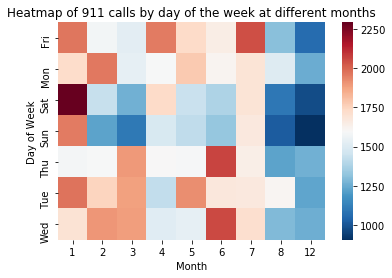

In [35]:
sns.heatmap(df_dm,cmap='RdBu_r')
plt.title('Heatmap of 911 calls by day of the week at different months')
plt.show()

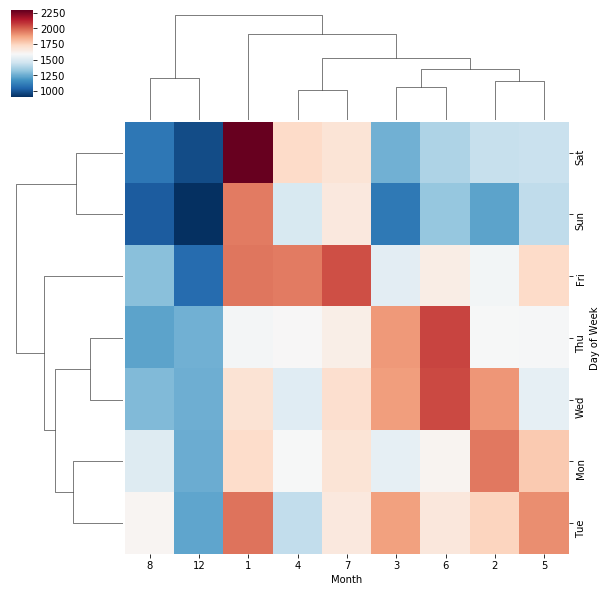

In [36]:
sns.clustermap(df_dm,cmap='RdBu_r')
plt.show()

## Data viz: reasons for Emergency Medical Services calls

** Extract a dataframe of EMS calls **

In [37]:
df_ems = df[df['Reason']=='EMS'].copy()

** How many total EMS calls? **

In [38]:
len(df_ems)

48877

** Most common departments for EMS calls **

In [39]:
df_ems.Department.value_counts().head()

 RESPIRATORY EMERGENCY    5112
 CARDIAC EMERGENCY        5012
 FALL VICTIM              4863
 VEHICLE ACCIDENT         3935
 SUBJECT IN PAIN          2687
Name: Department, dtype: int64

** Do specific reasons for calls vary by township? **

In [40]:
byTwpDept = df_ems.groupby(['Department','twp']).count().reset_index()
byTwpDept = byTwpDept[['Department','twp','lat']].rename(columns={'lat':'count'}).sort_values(by='count',ascending=False)

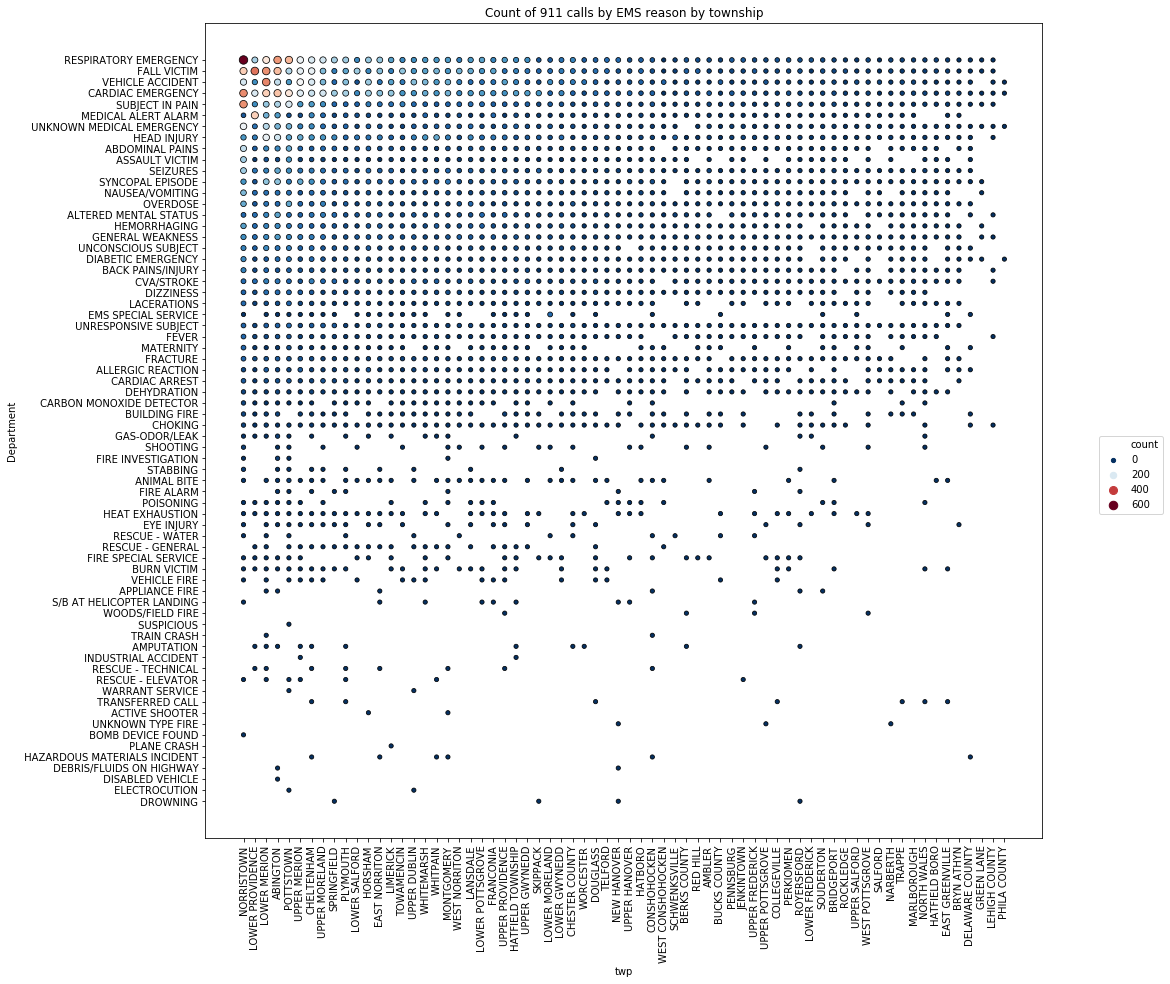

In [41]:
plt.figure(figsize=(15,15))
g = sns.scatterplot(x='twp',y='Department',data=byTwpDept, hue='count', size='count',edgecolor='black',lw=1,palette='RdBu_r')
g.invert_yaxis()
plt.legend(loc=1, bbox_to_anchor=(1.15,0.5), ncol=1)
plt.setp(g.get_xticklabels(),rotation=90)
plt.title('Count of 911 calls by EMS reason by township')
plt.show()